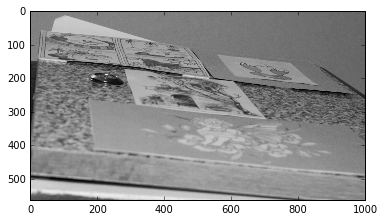

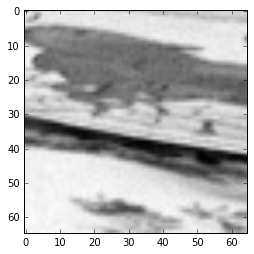

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import time
import numpy as np
import os
from PIL import Image

patch_size = 65
image = np.array(Image.open('img/fox.png').convert('L'))
plt.figure()
plt.imshow(image, cmap="gray")

h,w = image.shape
patch = image[h/4: h/4 + patch_size,w/3 : w/3 + patch_size]
plt.figure()
plt.imshow(patch, cmap="gray")


In [4]:
from pytorch_sift import SIFTNet

SIFT = SIFTNet(patch_size = patch_size)
SIFT.eval()

# It takes n_patches x 1 x patch_size x patch_size input == standard pytorch batch format
patches = np.ndarray((1, 1, patch_size, patch_size), dtype=np.float32)
patches[0,0,:,:] = patch
t = time.time()
with torch.no_grad():
    torch_patches = torch.from_numpy(patches)
    res = SIFT(torch_patches)
    sift = np.round(512. * res.data.cpu().numpy()).astype(np.int32)
print ('time', time.time() - t)
print (sift)   


('time', 0.0208740234375)
[[  4   6   7   9   8  19  22  13   3   7   9  14   2   4   4   3   5   9
   11   8  17  57  51  22  11  29  23  18   3   7   9   9  18  11  13  12
   77  93  91  99 119 119 119  73  30  73  98  79  17   9   7   3  60  47
   57  26  56  86  76  42  15  39  67  50   6   7   7   2  19  20  27  11
    5   7  12  18   5   7   5   4   8  13  12   5  20  26  17  16  14  17
   15  20   5  15   3   4  24  49  71  57  85  56  31  40 104 119 119 119
   12  48  29  25  10  21  28  34  34  36  31  18  42  69  84  60   5  20
   22  14]]


In [5]:
#Now on GPU:

SIFT = SIFT.cuda()
with torch.no_grad():
    torch_patches = torch.from_numpy(patches).cuda()
    res = SIFT(torch_patches)
    sift = np.round(512. * res.data.cpu().numpy()).astype(np.int32)
print (sift)   


[[  4   6   7   9   8  19  22  13   3   7   9  14   2   4   4   3   5   9
   11   8  17  57  51  22  11  29  23  18   3   7   9   9  18  11  13  12
   77  93  91  99 119 119 119  73  30  73  98  79  17   9   7   3  60  47
   57  26  56  86  76  42  15  39  67  50   6   7   7   2  19  20  27  11
    5   7  12  18   5   7   5   4   8  13  12   5  20  26  17  16  14  17
   15  20   5  15   3   4  24  49  71  57  85  56  31  40 104 119 119 119
   12  48  29  25  10  21  28  34  34  36  31  18  42  69  84  60   5  20
   22  14]]
